<a href="https://colab.research.google.com/github/StellaIbeh/Diabetes_Prediction_Mode-/blob/main/Diabetes_Prediction_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Necessary Installation
!pip install tensorflow
!pip install keras

In [42]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from keras.regularizers import l1, l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import RMSprop as Rmsprop

In [3]:
# Mount Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load dataset from drive
data=pd.read_csv('/content/drive/MyDrive/summative_diabetes/diabetes.csv')

In [5]:
#Print the first 10 rows of the data
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
# Step 1: Checking for Missing Values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# describe data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#check the shape of the data
data.shape

(768, 9)

In [10]:
# check the data correlation
data.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


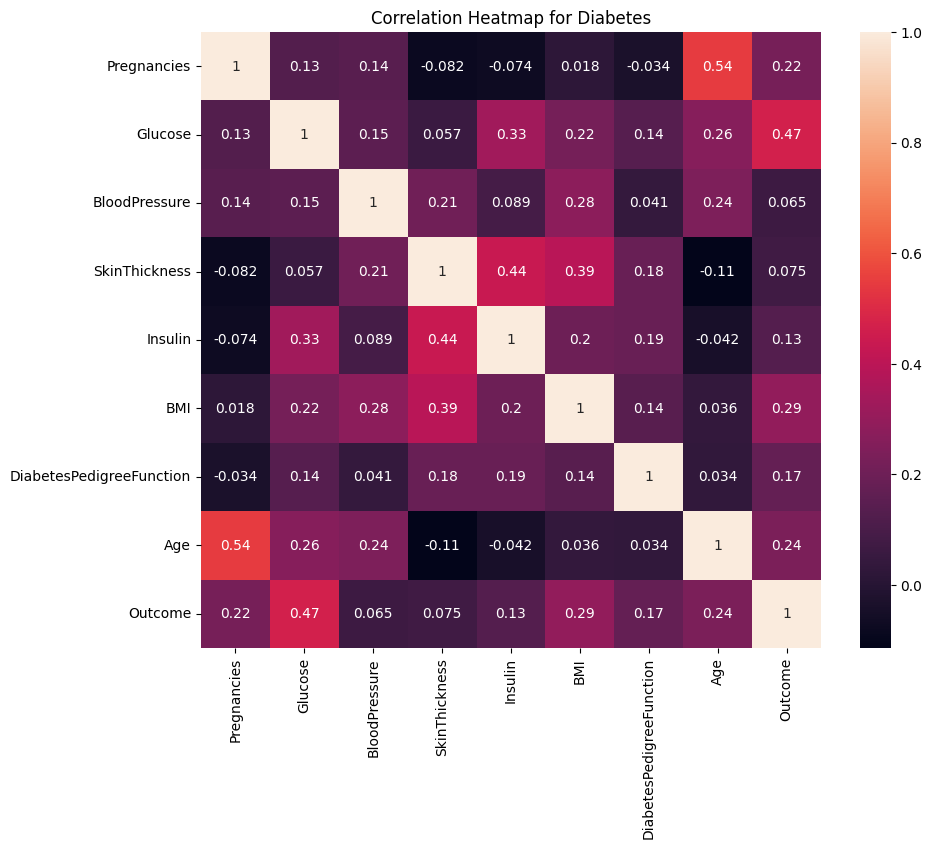

In [11]:
#Plot correlation Heatmap for dataset
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap for Diabetes')
plt.show()


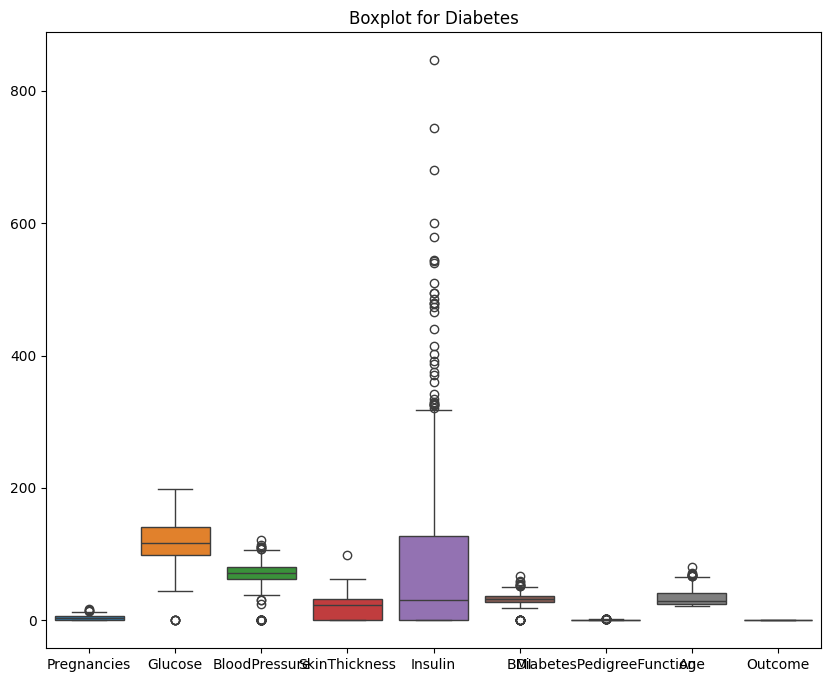

In [12]:
#Check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=data)
plt.title('Boxplot for Diabetes')
plt.show()

Feature Selection and Standardization


In [22]:
# Step 5: Feature Selection and Target Variable
"""
Separate the features (X) and target variable (y).
The target variable ' Outcome' indicates whether the diabetes is present (1) or not (0).
"""
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target

# Display shapes of features and target
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Step 6: Standardizing the Features
"""
Standardize the feature values to have a mean of 0 and standard deviation of 1.
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape of scaled features (X_scaled):", X_scaled.shape)

# Step 7: Reshape the Features for CNN
"""
Reshape the scaled feature matrix to fit a 3D shape for CNN..
"""
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
print("Shape of reshaped features (X_reshaped):", X_reshaped.shape)

Shape of features (X): (768, 8)
Shape of target (y): (768,)
Shape of scaled features (X_scaled): (768, 8)
Shape of reshaped features (X_reshaped): (768, 8, 1)


Split the data for training and testing

In [23]:

# Step 8: Splitting the Data into Training and Testing Sets
"""
Split the dataset into 80% training and 20% testing sets.
"""
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8, 1)
Shape of X_test: (154, 8, 1)
Shape of y_train: (614,)
Shape of y_test: (154,)


Start the Training Process For Vanilla Model Using CNN


In [30]:
# Step 9: Constructing the Vanilla CNN Model using Sequential API

# Define the model
simple_model = Sequential()


# First Convolutional Layer
simple_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(9, 1)))  # 32 filters, kernel size 3, ReLU activation
simple_model.add(MaxPooling1D(pool_size=2))  # Max Pooling with pool size 2

# Second Convolutional Layer
simple_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # 64 filters, kernel size 3, ReLU activation

# Flatten the data to pass it to the Dense layer
simple_model.add(Flatten())

# Fully Connected (Dense) Layer
simple_model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation

# Output Layer
simple_model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification (0 or 1)

#Compile the model with sdg
simple_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#summarize the model
simple_model.summary()

#Train the model
history = simple_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

#save the model
simple_model.save('simple_model.h5')
simple_model.save('/content/drive/MyDrive/summative_diabetes/simple_model.h5')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 7, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,561 (41.25 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6560 - loss: 0.6855 - val_accuracy: 0.6429 - val_loss: 0.6860
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 0.6786 - val_accuracy: 0.6429 - val_loss: 0.6772
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6734 - loss: 0.6617 - val_accuracy: 0.6429 - val_loss: 0.6691
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6589 - loss: 0.6590 - val_accuracy: 0.6429 - val_loss: 0.6619
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6481 - loss: 0.6544 - val_accuracy: 0.6429 - val_loss: 0.6553
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 0.6438 - val_accuracy: 0.6429 - val_loss: 0.6491
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6252 - loss: 0.6495 - val_accuracy: 0.6429 - val_loss: 0.6426
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6364 - loss: 0.6420 - val_accuracy: 0.6429 - 

In [31]:
# Evaluate the model
loss, accuracy = simple_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7307 - loss: 0.5041 
Test Loss: 0.4912
Test Accuracy: 0.7597


Error Analysis : Confusion Matrix and Classification Report


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
[[79 20]
 [17 38]]


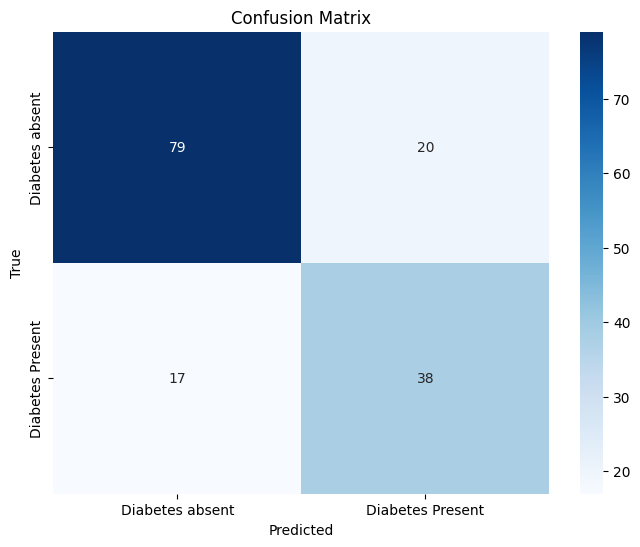

In [35]:
#Error Analysis
#Predicting the test set
y_pred = simple_model.predict(X_test)

# Convert Prediction to binary classification
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1) # Using threshold 0.5 and reshaping to 1D

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Diabetes absent', 'Diabetes Present'], yticklabels=['Diabetes absent', 'Diabetes Present'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()





**OPTIMIZED MODEL**

In [58]:
# Define the model with L1 Regularization and Dropout
def create_optimized_model(l1_lambda=0.0001, dropout_rate=0.5):
    optimized_model = Sequential()

    # First Convolutional Layer with L1 regularization and Dropout
    optimized_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(9, 1),
                     kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    optimized_model.add(MaxPooling1D(pool_size=2))
    optimized_model.add(Dropout(dropout_rate))

    # Second Convolutional Layer with L1 regularization and Dropout
    optimized_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                     kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    optimized_model.add(Dropout(dropout_rate))

    # Flatten the data
    optimized_model.add(Flatten())

    # Fully Connected Layer with L1 regularization and Dropout
    optimized_model.add(Dense(64, activation='relu',
                    kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    optimized_model.add(Dropout(dropout_rate))

    optimized_model.add(Dense(64, activation='relu',
                    kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    optimized_model.add(Dropout(dropout_rate))

    # Output Layer for binary classification
    optimized_model.add(Dense(1, activation='sigmoid'))

    # Compile the model using Adam optimizer
    optimizer = Rmsprop(learning_rate=0.01)
    optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return optimized_model

# Create and compile the L1 regularized model with Dropout
optimized_model = create_optimized_model()

# Display the model summary
optimized_model.summary

# Early stopping callbacks
early_stopping_val_loss = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
early_stopping_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model with Early Stopping callbacks
history = optimized_model.fit(X_train, y_train, epochs=150, batch_size=32,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping_val_loss, early_stopping_val_accuracy])

# Save the model
optimized_model.save('optimized_model.h5')
optimized_model.save('/content/drive/MyDrive/summative_diabetes/optimized_model.h5')

# Evaluate the model
test_loss, test_accuracy = optimized_model.evaluate(X_test, y_test)
print(f"L1 Regularized Model with Dropout - Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6457 - loss: 0.8005 - val_accuracy: 0.6299 - val_loss: 0.7477
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7192 - loss: 0.7180 - val_accuracy: 0.7792 - val_loss: 0.6267
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7093 - loss: 0.7047 - val_accuracy: 0.7403 - val_loss: 0.6303
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6997 - loss: 0.6943 - val_accuracy: 0.7468 - val_loss: 0.6463
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7036 - loss: 0.6771 - val_accuracy: 0.7922 - val_loss: 0.5988
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6823 - loss: 0.6552 - val_accuracy: 0.7468 - val_loss: 0.6032
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7265 - loss: 0.6423 - val_accuracy: 0.7987 - val_loss: 0.6040
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7366 - loss: 0.6168 - val_accuracy: 0.8052 -

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.6407 
L1 Regularized Model with Dropout - Test Accuracy: 82.47%


Error Analysis

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
[[92  7]
 [20 35]]


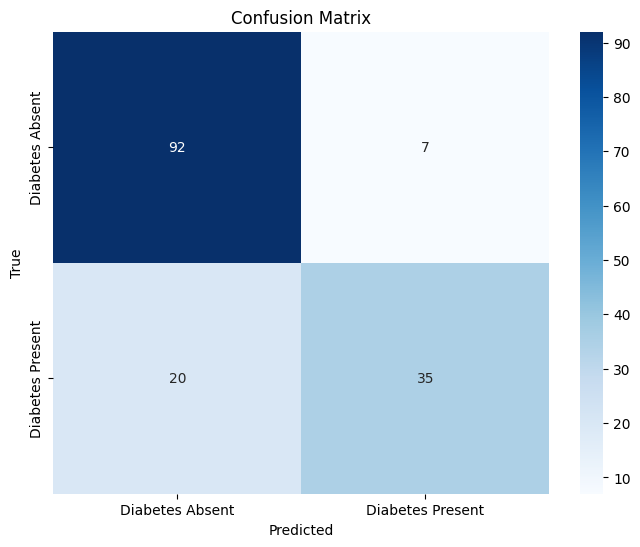

Classification Report:
                  precision    recall  f1-score   support

 Diabetes Absent       0.82      0.93      0.87        99
Diabetes Present       0.83      0.64      0.72        55

        accuracy                           0.82       154
       macro avg       0.83      0.78      0.80       154
    weighted avg       0.83      0.82      0.82       154



In [59]:
# Predicting the test set
y_pred = optimized_model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)  # Convert predictions to 0 or 1

# Compute and Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Diabetes Absent', 'Diabetes Present'], yticklabels=['Diabetes Absent', 'Diabetes Present'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Diabetes Absent', 'Diabetes Present']))